<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal-of-Multi-Layer-Perceptrons" data-toc-modified-id="Goal-of-Multi-Layer-Perceptrons-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal of Multi-Layer Perceptrons</a></span></li><li><span><a href="#Import-Libraries-and-Data" data-toc-modified-id="Import-Libraries-and-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Libraries and Data</a></span></li><li><span><a href="#Creating-the-data-set-(target,-dummy)" data-toc-modified-id="Creating-the-data-set-(target,-dummy)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Creating the data set (target, dummy)</a></span><ul class="toc-item"><li><span><a href="#Standardize-data" data-toc-modified-id="Standardize-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Standardize data</a></span></li></ul></li><li><span><a href="#Helper-Function" data-toc-modified-id="Helper-Function-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Helper Function</a></span></li><li><span><a href="#First-Model" data-toc-modified-id="First-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>First Model</a></span><ul class="toc-item"><li><span><a href="#Result-of-First-Model" data-toc-modified-id="Result-of-First-Model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Result of First Model</a></span></li><li><span><a href="#Modify-Number-of-Epochs-for-First-Model" data-toc-modified-id="Modify-Number-of-Epochs-for-First-Model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Modify Number of Epochs for First Model</a></span></li></ul></li><li><span><a href="#Second-Model:-Add-a-third-Activation-Function" data-toc-modified-id="Second-Model:-Add-a-third-Activation-Function-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Second Model: Add a third Activation Function</a></span><ul class="toc-item"><li><span><a href="#Result" data-toc-modified-id="Result-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Result</a></span></li></ul></li><li><span><a href="#Third-Model:-Change-Activation-Function" data-toc-modified-id="Third-Model:-Change-Activation-Function-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Third Model: Change Activation Function</a></span></li><li><span><a href="#Fourth-model:--Use-Unscaled-Data" data-toc-modified-id="Fourth-model:--Use-Unscaled-Data-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Fourth model:  Use Unscaled Data</a></span></li><li><span><a href="#Exploration-of-Feature-Importance-Influence-on-MLP" data-toc-modified-id="Exploration-of-Feature-Importance-Influence-on-MLP-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Exploration of Feature Importance Influence on MLP</a></span></li></ul></div>

# Goal of Multi-Layer Perceptrons
Section 45, Deeper Neural Networks Lab

# Import Libraries and Data

In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams

plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import itertools
import statsmodels.api as sm
import operator

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

import time

import re
from bs4 import BeautifulSoup
import requests
import urllib.request
from urllib.request import Request, urlopen

import keras
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [2]:
df = pd.read_csv('cleaned_coffee_reviews.csv')

In [3]:
df.columns
df = df.drop(columns=['Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0'], axis=1)
df.head(2)

,Coffee Name,Roaster Name,Roaster Location,Coffee Origin,Rating,Roast Level,Review Date,Price,Agtron,Flavor,Body,Aroma,Aftertaste,Acidity,Bottom Line,Prices Per Oz,Agtron Whole,Agtron Ground,Coffee Country
0,Costa Rica Luis Campos Anaerobic,Revel Coffee,"Billings, Montana","Tarrazu, Costa Rica",94,Medium-Light,April 2020,$23.00/12 ounces,58/76,9,9,9,8,9.0,Enjoying this Costa Rica evokes the pleasures ...,1.92,58,76,Costa Rica
1,Colombia Granja La Esperanza Tres Dragones,PT's Coffee Roasting Co.,"Topeka, Kansas","Valle del Cauca growing region, Colombia",94,Medium-Light,April 2020,$23.50/12 ounces,60/74,9,9,9,8,9.0,A bombshell of a coffee with enough personalit...,1.96,60,74,Colombia


# Creating the data set (target, dummy)

In [4]:
# A rating of 95 or better is about 10% of the coffees
# A rating of 94 or better is about 25% of the coffees
df['Great'] = [1 if x >= 95 else 0 for x in df['Rating']] 

In [5]:
rl_dummies = pd.get_dummies(df['Roast Level'], prefix='RL')

In [6]:
country_dummies = pd.get_dummies(df['Coffee Country'], prefix='CC')

In [7]:
df = pd.concat([df, rl_dummies, country_dummies], axis=1)
df.head(2)

,Coffee Name,Roaster Name,Roaster Location,Coffee Origin,Rating,Roast Level,Review Date,Price,Agtron,Flavor,...,CC_Tanzania,CC_Thailand,CC_USA,CC_Uganda,CC_United Kingdom,CC_World Blend,CC_Yemen,CC_Zambia,CC_Zimbabwe,CC_undisclosed
0,Costa Rica Luis Campos Anaerobic,Revel Coffee,"Billings, Montana","Tarrazu, Costa Rica",94,Medium-Light,April 2020,$23.00/12 ounces,58/76,9,...,0,0,0,0,0,0,0,0,0,0
1,Colombia Granja La Esperanza Tres Dragones,PT's Coffee Roasting Co.,"Topeka, Kansas","Valle del Cauca growing region, Colombia",94,Medium-Light,April 2020,$23.50/12 ounces,60/74,9,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y = df['Great']
X = df.drop(columns=['Coffee Name','Roaster Name','Roaster Location','Coffee Origin','Rating','Roast Level','Review Date',
                     'Price','Agtron','Bottom Line','Agtron Whole','Great','Coffee Country'], axis=1)

In [9]:
# 52 columns
# X.head()

## Standardize data

In [10]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Helper Function

In [42]:
def visualize_training_results(results, feature = ''):
    history = results.history

# This puts the two plots on top of each other

#     plt.figure()
#     plt.plot(history['val_loss'])
#     plt.plot(history['loss'])
#     plt.legend(['test_loss', 'train_loss'])
#     plt.title('{} Loss'.format(feature))
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.show()
    
#     plt.figure()
#     plt.plot(history['val_acc'])
#     plt.plot(history['acc'])
#     plt.legend(['test_acc', 'train_acc'])
#     plt.title('Accuracy')
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.show()

# Now the plots are side-by-side

    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))
    
    ax1.plot(history['val_loss'])
    ax1.plot(history['loss'])
    ax1.legend(['test_loss', 'train_loss'])
    ax1.title.set_text('{} Loss'.format(feature))
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
 
    
    ax2.plot(history['val_acc'])
    ax2.plot(history['acc'])
    ax2.legend(['test_acc', 'train_acc'])
    ax2.title.set_text('{} Accuracy'.format(feature))
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    
    if feature != '':
        fig.suptitle('MLP Model Without The {} Feature'.format(feature),y=1.12)
    print("")
    fig.tight_layout()
    plt.show()

# First Model

In [12]:
model_1 = Sequential()
model_1.add(Dense(5, activation='tanh', input_shape=(52,)))
model_1.add(Dense(1, activation='sigmoid'))

In [13]:
model_1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [14]:
# Verbose = 0 is no logging
# Verbose = 1 is progress bar
# Verbose = 2 is one log line per epoch
start = time.time()

results_1 = model_1.fit(scaled_X, y, epochs=25, batch_size=1, validation_split=0.2, verbose=1)

end = time.time()

print('It took {} seconds to run this model'.format(end-start))

Train on 1756 samples, validate on 439 samples
Epoch 1/25
1756/1756 [==============================] - 3s 2ms/step - loss: 0.2991 - acc: 0.8833 - val_loss: 0.1112 - val_acc: 0.9704
Epoch 2/25
1756/1756 [==============================] - 2s 1ms/step - loss: 0.1100 - acc: 0.9749 - val_loss: 0.0703 - val_acc: 0.9841
Epoch 3/25
1756/1756 [==============================] - 3s 2ms/step - loss: 0.0694 - acc: 0.9892 - val_loss: 0.0560 - val_acc: 0.9863
Epoch 4/25
1756/1756 [==============================] - 3s 2ms/step - loss: 0.0499 - acc: 0.9937 - val_loss: 0.0502 - val_acc: 0.9863
Epoch 5/25
1756/1756 [==============================] - 3s 1ms/step - loss: 0.0395 - acc: 0.9949 - val_loss: 0.0498 - val_acc: 0.9886
Epoch 6/25
1756/1756 [==============================] - 3s 1ms/step - loss: 0.0329 - acc: 0.9943 - val_loss: 0.0523 - val_acc: 0.9841
Epoch 7/25
1756/1756 [==============================] - 2s 1ms/step - loss: 0.0276 - acc: 0.9954 - val_loss: 0.0508 - val_acc: 0.9863
Epoch 8/25
1756

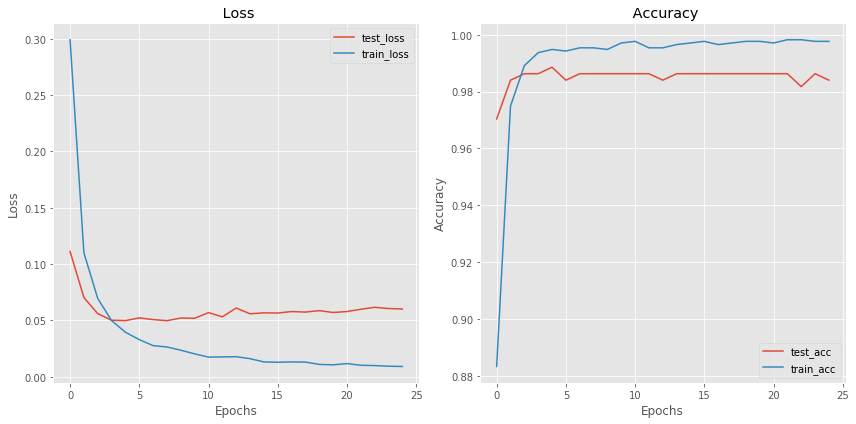

In [36]:
visualize_training_results(results_1)

## Result of First Model
Overfitting around 3rd epoch when training performance improves but testing slightly increases

## Modify Number of Epochs for First Model
An epoch is a measure of the number of times all of the training vectors are used once to update the weights. For batch training all of the training samples pass through the learning algorithm simultaneously in one epoch before weights are updated.

In [16]:
results_1a = model_1.fit(scaled_X, y, epochs=5, batch_size=1, validation_split=0.2, verbose=0)

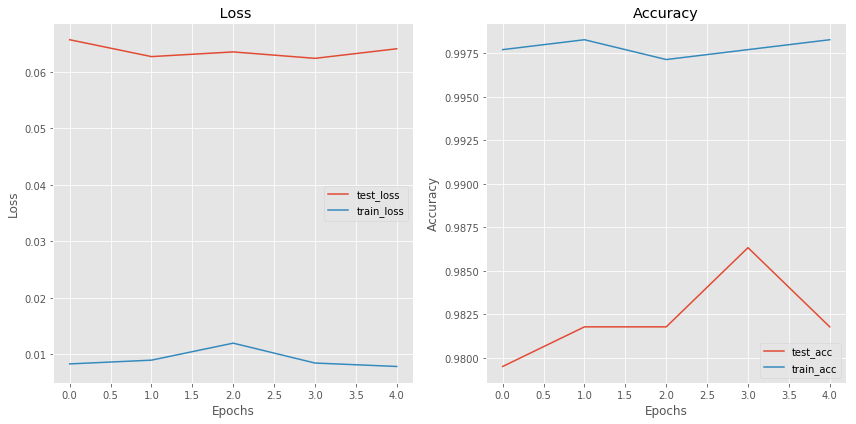

In [17]:
visualize_training_results(results_1a)

# Second Model: Add a third Activation Function

In [18]:
model_2 = Sequential()
model_2.add(Dense(10, activation='tanh', input_shape=(52,)))
model_2.add(Dense(5, activation='tanh'))
model_2.add(Dense(1, activation='sigmoid'))

In [19]:
model_2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [20]:
results_2 = model_2.fit(scaled_X, y, epochs=25, batch_size=1, validation_split=0.2, verbose=0)

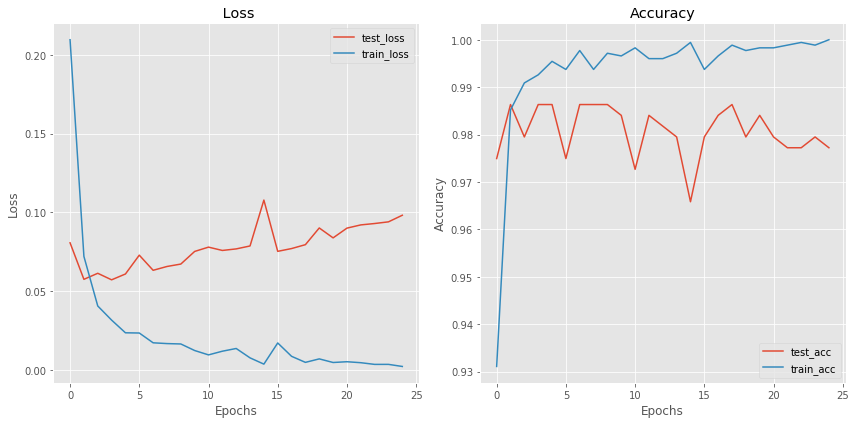

In [21]:
visualize_training_results(results_2)

## Result
Adding another layer didn't make the model better, in fact, it seemed to overtrain it more.

# Third Model: Change Activation Function

In [22]:
model_3 = Sequential()
model_3.add(Dense(5, activation='tanh', input_shape=(52,)))
model_3.add(Dense(1, activation='relu'))

In [23]:
model_3.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [24]:
results_3 = model_3.fit(scaled_X, y, epochs=25, batch_size=1, validation_split=0.2, verbose=0)

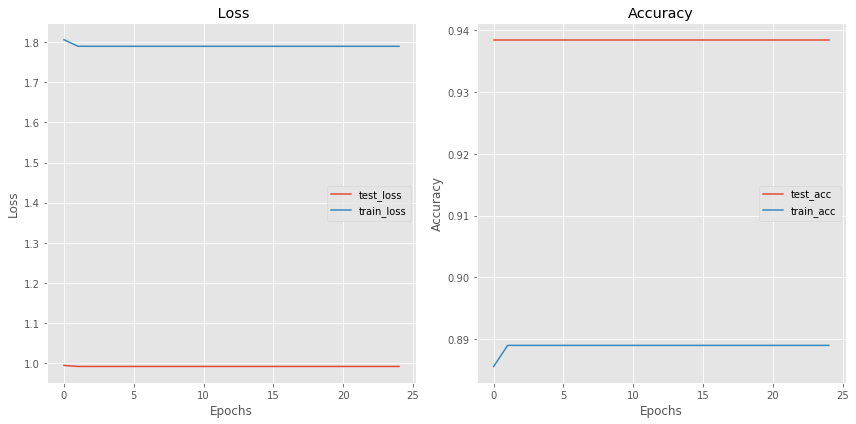

In [25]:
visualize_training_results(results_3)

# Fourth model:  Use Unscaled Data

In [26]:
model_4 = Sequential()
model_4.add(Dense(5, activation='tanh', input_shape=(52,)))
model_4.add(Dense(1, activation='sigmoid'))

In [27]:
model_4.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [28]:
results_4 = model_4.fit(X, y, epochs=25, batch_size=1, validation_split=0.2, verbose=0)

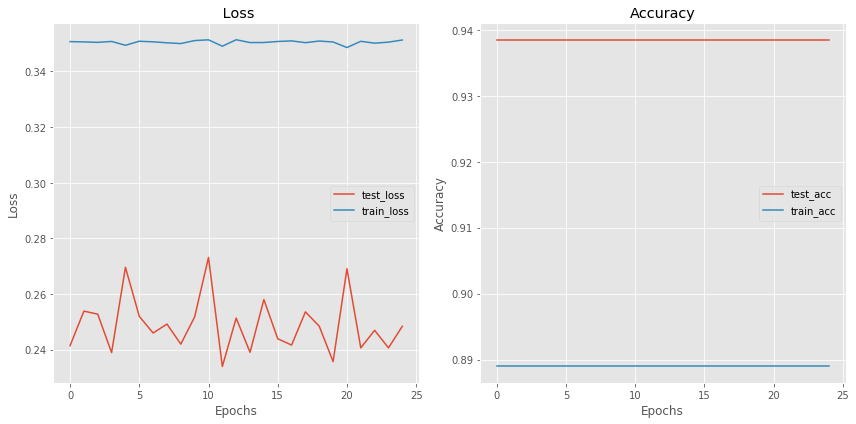

In [29]:
visualize_training_results(results_4)

# Exploration of Feature Importance Influence on MLP

In [31]:
# Top 6 features from XGBoost

features =['Aroma','Flavor','Body','Aftertaste','Acidity','Prices Per Oz']

In [32]:
'''
This function is called by mlp_model to create the target dataframe and the features dataframe
minus one of the top features as determined by the XGBoost model
'''

def dataframe_creation(feature):
    df = pd.read_csv('cleaned_coffee_reviews.csv')
    df = df.drop(columns=['Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0'], axis=1)
    
    df['Great'] = [1 if x >= 95 else 0 for x in df['Rating']] 
    rl_dummies = pd.get_dummies(df['Roast Level'], prefix='RL')
    country_dummies = pd.get_dummies(df['Coffee Country'], prefix='CC')
    df = pd.concat([df, rl_dummies, country_dummies], axis=1)
    
    # Create scaled df of X without 1 of 6 features
    y = df['Great']
    X = df.drop(columns=['Coffee Name','Roaster Name','Roaster Location','Coffee Origin','Rating','Roast Level',
                         'Review Date', 'Price','Agtron','Bottom Line','Agtron Whole','Great','Coffee Country',feature], axis=1)
    
    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X)
    return scaled_X,y

In [33]:
'''
This function runs the MLP on the dataframes without one of the top 6 features at a time
'''

def mlp_model():

    for feature in features:
        dataframe_creation(feature)
        
        model = Sequential()
        model.add(Dense(5, activation='tanh', input_shape=(52,)))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
        results = model.fit(scaled_X, y, epochs=25, batch_size=1, validation_split=0.2, verbose=0)
        visualize_training_results(results,feature)

In [ ]:
# These are the original results from model 1

visualize_training_results(results_1)

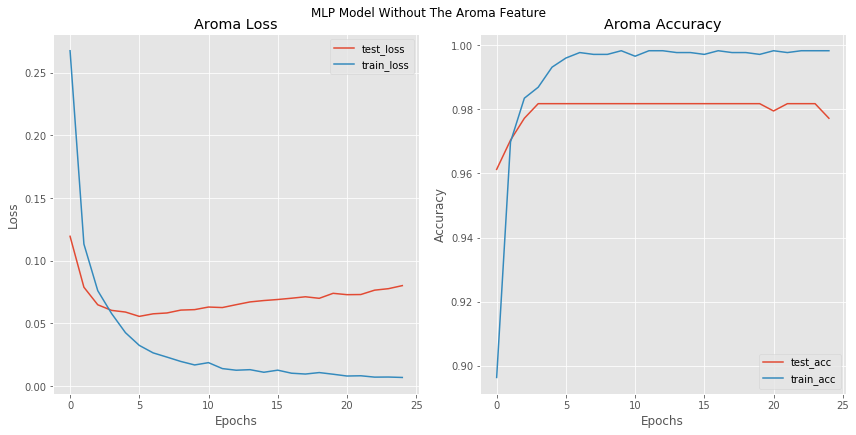

KeyboardInterrupt: 

In [43]:
mlp_model()